In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [226]:
original = pd.read_csv('ml/titanic/train.csv', index_col='PassengerId')

In [227]:
original.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Age         177
Cabin       687
dtype: int64

In [228]:
data = original.copy()
data['Age'] = data.Age.fillna(data.Age.mean())
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


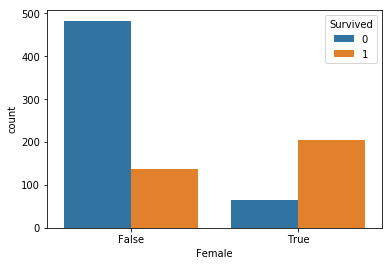

In [229]:
data['Female'] = (data['Sex'] == 'female') & (data["Age"] >= 16)
sns.countplot('Female', hue='Survived', data=data);

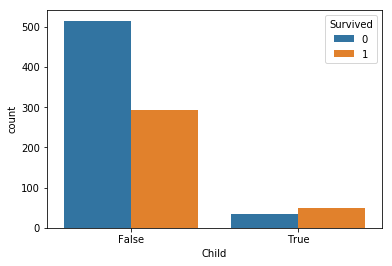

In [230]:
data['Child'] = data["Age"] < 16
sns.countplot('Child', hue='Survived', data=data);

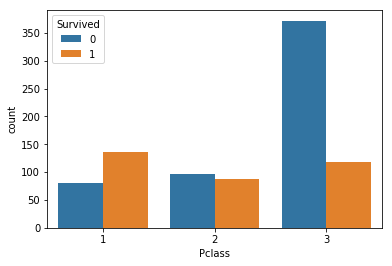

In [231]:
sns.countplot('Pclass', hue='Survived', data=data);

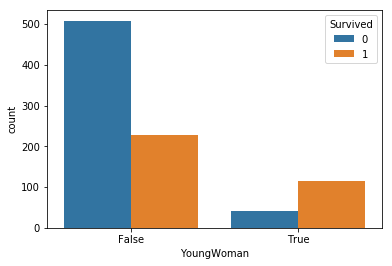

In [232]:
data['YoungWoman'] = (data['Age'] > 20) & (data['Age'] < 35) & (data['Female'])
sns.countplot('YoungWoman', hue='Survived', data=data);

94

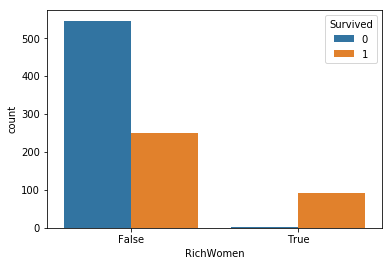

In [233]:
data['RichWomen'] = (data['Sex'] == 'female') & (data['Pclass'] == 1)
sns.countplot('RichWomen', hue='Survived', data=data);
data['RichWomen'].sum()
#sns.countplot('Rich', hue='Survived', data=data);

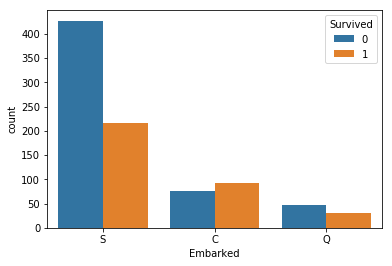

In [234]:
sns.countplot('Embarked', hue='Survived', data=data);

In [235]:
data["FemaleOrChild"] = (data["Age"] < 16) | (data["Sex"] == "female")

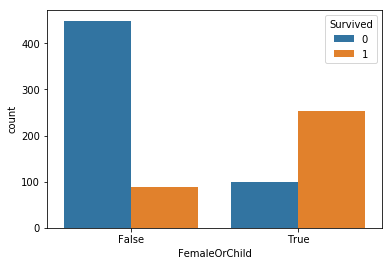

In [236]:
sns.countplot('FemaleOrChild', hue='Survived', data=data);

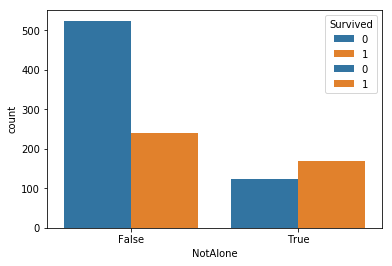

In [249]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Embarked'] = original['Embarked']
data['Embarked'] = data.Embarked.fillna('S')
le.fit(data['Embarked'])
data['Embarked'] = le.transform(data['Embarked'])

data['Family'] = data['SibSp'] + data['Parch']

data['NotAlone'] = (data['Family'] > 0) & (data['Family'] < 4)
data['FemaleNotAlone'] = (data['Female']) & (data['NotAlone'])
data['MaleNotAlone'] = (data['Sex'] == 'male') & (data['NotAlone'])

sns.countplot('NotAlone', hue='Survived', data=data);

In [240]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Child,YoungWoman,RichWomen,FemaleOrChild,Family,NotAlone
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,2,False,False,False,False,False,1,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0,True,False,False,True,True,1,True
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,True,False,True,False,True,0,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,2,True,False,False,True,True,1,True
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,2,False,False,False,False,False,0,False
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,1,False,False,False,False,False,0,False
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,2,False,False,False,False,False,0,False
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,2,False,True,False,False,True,4,False
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,2,True,False,True,False,True,2,True


In [252]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#X = data[['Pclass', 'FemaleOrChild', 'RichWomen', 'PoorMan', 'Age', 'NotAlone', 'Fare', 'Embarked']]
#X = data[['Pclass', 'Female', 'Child', 'RichWomen', 'Age', 'NotAlone', 'Fare', 'Embarked']]
X = data[['Pclass', 'Female', 'Child', 'Age', 'NotAlone', 'Fare', 'Embarked']]
#X = data[['Pclass', 'RichWomen', 'FemaleOrChild', 'NotAlone', 'Fare']]
#X = data[['Pclass', 'RichWomen', 'Female', 'Child', 'FemaleNotAlone', 'Fare']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

forest = RandomForestClassifier(max_depth=8, n_estimators=70).fit(X_train, y_train)
score1 = cross_val_score(forest, X, y, cv=3)
print("[Random Forest] train score:", forest.score(X_train, y_train))
print("[Random Forest] test score: ", forest.score(X_test, y_test))
print("[Random Forest] Cross validation:")
print(score1)
print(score1.mean())

print('-' * 50)

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC(C=100, gamma=0.01)),
])
pipeline.fit(X_train, y_train)
score = cross_val_score(pipeline, X, y, cv=3)
print("[SVC] train score:", pipeline.score(X_train, y_train))
print("[SVC] test score: ", pipeline.score(X_test, y_test))
print("[SVC] Cross validation:")
print(score)
print(score.mean())

[Random Forest] train score: 0.9326347305389222
[Random Forest] test score:  0.8161434977578476
[Random Forest] Cross validation:
[0.78114478 0.84511785 0.80808081]
0.8114478114478114
--------------------------------------------------
[SVC] train score: 0.8233532934131736
[SVC] test score:  0.7937219730941704
[SVC] Cross validation:
[0.78451178 0.82491582 0.7979798 ]
0.8024691358024691


In [242]:
pipeline.predict(X_train.sort_index().iloc[:3])

array([1, 1, 1])

In [243]:
y_train.sort_index().iloc[:3]

PassengerId
2    1
3    1
4    1
Name: Survived, dtype: int64

In [244]:
X_train.sort_index().iloc[:3]

,Pclass,Female,Child,Age,NotAlone,Fare,Embarked
PassengerId,,,,,,,
2,1,True,False,38.0,True,71.2833,0
3,3,True,False,26.0,False,7.9250,2
4,1,True,False,35.0,True,53.1000,2


In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

grid = [
    {
        'classifier': [SVC()],
        'preprocessing': [RobustScaler(), StandardScaler(), MinMaxScaler()],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [RandomForestClassifier()],
        'preprocessing': [None],
        'classifier__n_estimators': [10, 30, 50, 70, 100],
        'classifier__max_depth': [2, 4, 6, 8, 10, 12, 15]
    }
]

search = GridSearchCV(pipe, grid, cv=5)
search.fit(X_train, y_train)

print("Best params:\n{}\n".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))



Best params:
{'classifier__max_depth': 8, 'classifier__n_estimators': 70, 'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'preprocessing': None}

Best cross-validation score: 0.84


In [246]:
forest.feature_importances_

array([0.15205047, 0.36622368, 0.03938584, 0.14726779, 0.05276725,
       0.20953737, 0.03276759])

Feature ranking:
1. feature 1 (0.366224)
2. feature 5 (0.209537)
3. feature 0 (0.152050)
4. feature 3 (0.147268)
5. feature 4 (0.052767)
6. feature 2 (0.039386)
7. feature 6 (0.032768)


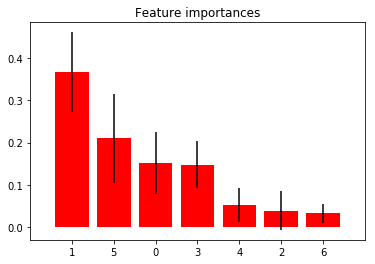

In [247]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [248]:
X

,Pclass,Female,Child,Age,NotAlone,Fare,Embarked
PassengerId,,,,,,,
1,3,False,False,22.000000,True,7.2500,2
2,1,True,False,38.000000,True,71.2833,0
3,3,True,False,26.000000,False,7.9250,2
4,1,True,False,35.000000,True,53.1000,2
5,3,False,False,35.000000,False,8.0500,2
6,3,False,False,29.699118,False,8.4583,1
7,1,False,False,54.000000,False,51.8625,2
8,3,False,True,2.000000,False,21.0750,2
9,3,True,False,27.000000,True,11.1333,2
